In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive connected successfully!")

Mounted at /content/drive
Google Drive connected successfully!


In [ ]:
import os

base = '/content/drive/MyDrive/updated-dataset-20260102T042016Z-3-001'

files = os.listdir(base)

print("Files inside your dataset folder:")
for f in files:
    full_path = os.path.join(base, f)
    print(f"\n {f}")
    print(f"   Path: {full_path}")
    if os.path.isdir(full_path):
        inside = os.listdir(full_path)
        print(f"   Contains: {inside}")

Files inside your dataset folder:

 updated-dataset
   Path: /content/drive/MyDrive/updated-dataset-20260102T042016Z-3-001/updated-dataset
   Contains: ['valid', 'train']


In [ ]:
import os

print("Copying dataset from Drive to local storage...")
print("Please wait, this may take 2-5 minutes...\n")

# Exact path
source = '/content/drive/MyDrive/updated-dataset-20260102T042016Z-3-001/updated-dataset'
destination = '/content/dataset'

!cp -r "{source}" "{destination}"

print(" Dataset copied successfully!")

print("\n" + "="*50)
print("VERIFICATION:")
print("="*50)

train_path = '/content/dataset/train'
valid_path = '/content/dataset/valid'

if os.path.exists(train_path):
    print(f" Train folder: {train_path}")
    classes = os.listdir(train_path)
    print(f"   Classes: {classes}")

if os.path.exists(valid_path):
    print(f"Valid folder: {valid_path}")
    classes = os.listdir(valid_path)
    print(f"   Classes: {classes}")

print("\n Ready for training!")

Copying dataset from Drive to local storage...
Please wait, this may take 2-5 minutes...

 Dataset copied successfully!

VERIFICATION:
 Train folder: /content/dataset/train
   Classes: ['Mild-Demented', 'Very-Mild-Demented', 'Non-Demented', 'Severe-Demented', 'Moderate-Demented']
Valid folder: /content/dataset/valid
   Classes: ['Mild-Demented', 'Very-Mild-Demented', 'Non-Demented', 'Severe-Demented', 'Moderate-Demented']

 Ready for training!


In [ ]:
import os

train_path = '/content/dataset/train'
valid_path = '/content/dataset/valid'

print("="*50)
print("TRAINING DATA:")
print("="*50)

train_counts = {}
for class_name in os.listdir(train_path):
    class_path = os.path.join(train_path, class_name)
    count = len(os.listdir(class_path))
    train_counts[class_name] = count
    print(f"{class_name}: {count} images")

print(f"\nTotal Training Images: {sum(train_counts.values())}")

print("\n" + "="*50)
print("VALIDATION DATA:")
print("="*50)

valid_counts = {}
for class_name in os.listdir(valid_path):
    class_path = os.path.join(valid_path, class_name)
    count = len(os.listdir(class_path))
    valid_counts[class_name] = count
    print(f"{class_name}: {count} images")

print(f"\nTotal Validation Images: {sum(valid_counts.values())}")

TRAINING DATA:
Mild-Demented: 1001 images
Very-Mild-Demented: 1000 images
Non-Demented: 1001 images
Severe-Demented: 1000 images
Moderate-Demented: 1001 images

Total Training Images: 5003

VALIDATION DATA:
Mild-Demented: 293 images
Very-Mild-Demented: 143 images
Non-Demented: 192 images
Severe-Demented: 4 images
Moderate-Demented: 239 images

Total Validation Images: 871


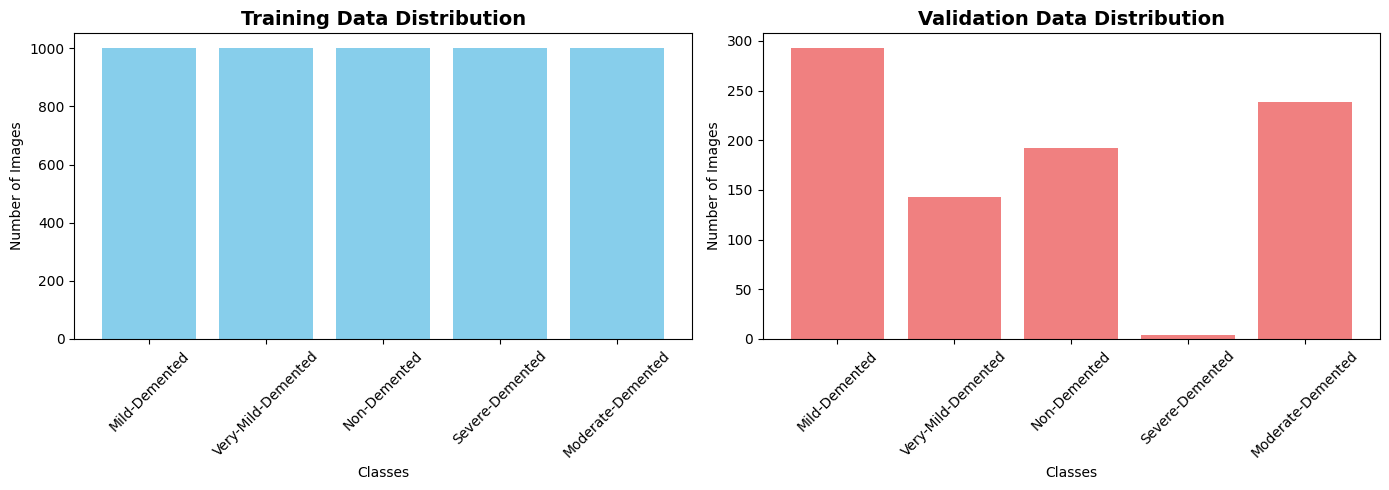


 Class Balance Ratio: 1.00
 Classes are reasonably balanced!


In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(train_counts.keys(), train_counts.values(), color='skyblue')
ax1.set_title('Training Data Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Number of Images')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(valid_counts.keys(), valid_counts.values(), color='lightcoral')
ax2.set_title('Validation Data Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Classes')
ax2.set_ylabel('Number of Images')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

max_count = max(train_counts.values())
min_count = min(train_counts.values())
ratio = max_count / min_count

print(f"\n Class Balance Ratio: {ratio:.2f}")
if ratio > 3:
    print(" WARNING: Classes are imbalanced! Some classes have too few images.")
    print(" Solution: Use data augmentation or class weights")
else:
    print(" Classes are reasonably balanced!")

Training Set Sample Images:


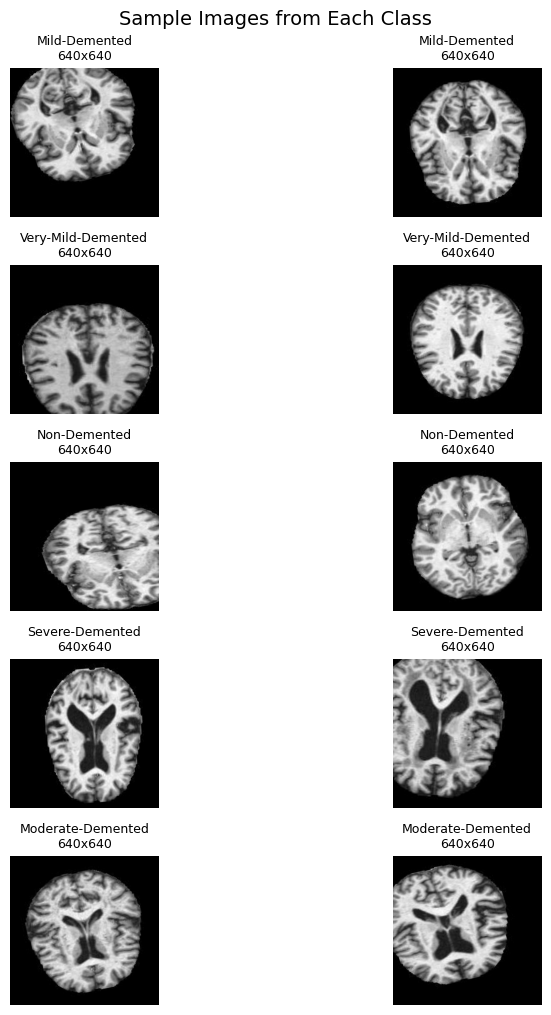

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

def show_sample_images(folder_path, num_per_class=2):
    """Har class se kuch images dikhao"""

    classes = os.listdir(folder_path)

    fig, axes = plt.subplots(len(classes), num_per_class, figsize=(10, len(classes)*2))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(folder_path, class_name)
        images = os.listdir(class_path)

        #select random images
        sample_images = random.sample(images, min(num_per_class, len(images)))

        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            if len(classes) > 1:
                ax = axes[i, j]
            else:
                ax = axes[j]

            ax.imshow(img)
            ax.set_title(f"{class_name}\n{img.shape[1]}x{img.shape[0]}", fontsize=9)
            ax.axis('off')

    plt.tight_layout()
    plt.suptitle('Sample Images from Each Class', fontsize=14, y=1.01)
    plt.show()

print("Training Set Sample Images:")
show_sample_images(train_path, num_per_class=2)

IMAGE SIZE ANALYSIS:
Width  - Min: 640px, Max: 640px, Avg: 640px
Height - Min: 640px, Max: 640px, Avg: 640px


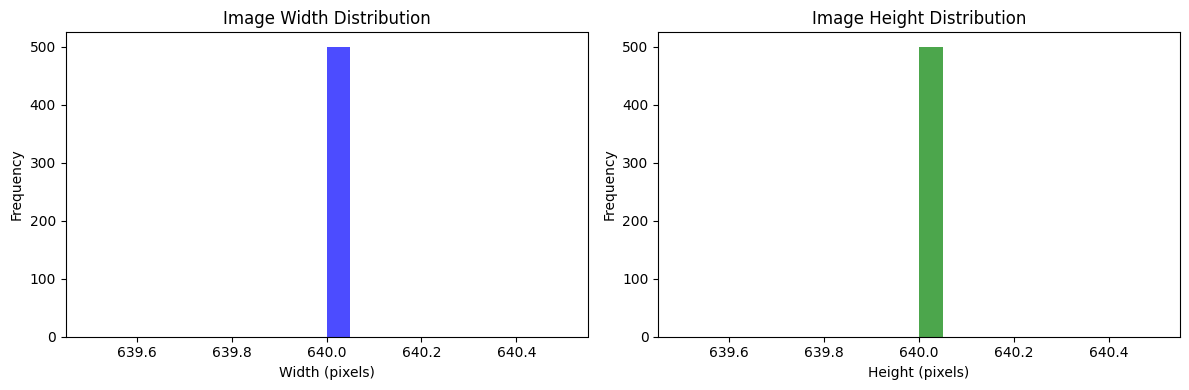


 Recommended CNN Input Size: 224x224


In [ ]:
import numpy as np

def check_image_sizes(folder_path, sample_size=100):


    widths = []
    heights = []

    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        images = os.listdir(class_path)[:sample_size]

        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                widths.append(w)
                heights.append(h)

    return widths, heights

widths, heights = check_image_sizes(train_path)

print("="*50)
print("IMAGE SIZE ANALYSIS:")
print("="*50)
print(f"Width  - Min: {min(widths)}px, Max: {max(widths)}px, Avg: {np.mean(widths):.0f}px")
print(f"Height - Min: {min(heights)}px, Max: {max(heights)}px, Avg: {np.mean(heights):.0f}px")

# Histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(widths, bins=20, color='blue', alpha=0.7)
ax1.set_title('Image Width Distribution')
ax1.set_xlabel('Width (pixels)')
ax1.set_ylabel('Frequency')

ax2.hist(heights, bins=20, color='green', alpha=0.7)
ax2.set_title('Image Height Distribution')
ax2.set_xlabel('Height (pixels)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Recommendation
avg_size = int((np.mean(widths) + np.mean(heights)) / 2)
recommended = min(224, max(128, avg_size))
print(f"\n Recommended CNN Input Size: {recommended}x{recommended}")

In [ ]:
def check_corrupted_images(folder_path):

    issues = []
    total = 0

    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            total += 1

            try:
                img = cv2.imread(img_path)
                if img is None:
                    issues.append(f"Cannot read: {img_path}")
                elif img.shape[0] < 32 or img.shape[1] < 32:
                    issues.append(f"Too small: {img_path}")
            except Exception as e:
                issues.append(f"Error: {img_path} - {e}")

    return issues, total

print("Checking image quality...")
issues, total = check_corrupted_images(train_path)

print("="*50)
print("DATA QUALITY REPORT:")
print("="*50)
print(f"Total images checked: {total}")
print(f"Issues found: {len(issues)}")

if issues:
    print("\n Problems:")
    for issue in issues[:10]:
        print(f"  - {issue}")
else:
    print("\n All images are good!")

Checking image quality...
DATA QUALITY REPORT:
Total images checked: 5003
Issues found: 3

 Problems:
  - Cannot read: /content/dataset/train/Mild-Demented/desktop.ini
  - Cannot read: /content/dataset/train/Non-Demented/desktop.ini
  - Cannot read: /content/dataset/train/Moderate-Demented/desktop.ini


In [ ]:
import os

def remove_desktop_ini(folder_path):
    count = 0
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)

        for file_name in os.listdir(class_path):
            if file_name == 'desktop.ini':
                file_path = os.path.join(class_path, file_name)
                os.remove(file_path)
                count += 1
                print(f"Deleted: {file_path}")

    return count

print("Removing desktop.ini files...")
train_removed = remove_desktop_ini('/content/dataset/train')
valid_removed = remove_desktop_ini('/content/dataset/valid')

print(f"\n Removed {train_removed + valid_removed} desktop.ini files")
print(" Dataset is now clean!")

Removing desktop.ini files...

 Removed 0 desktop.ini files
 Dataset is now clean!


In [ ]:

print("\nRechecking image quality...")
issues, total = check_corrupted_images(train_path)

print("="*50)
print("DATA QUALITY REPORT (AFTER CLEANUP):")
print("="*50)
print(f"Total images checked: {total}")
print(f"Issues found: {len(issues)}")

if issues:
    print("\n Remaining problems:")
    for issue in issues:
        print(f"  - {issue}")
else:
    print("\n No issues! ")


Rechecking image quality...
DATA QUALITY REPORT (AFTER CLEANUP):
Total images checked: 5000
Issues found: 0

 No issues! 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

print("✅ Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

✅ Libraries imported successfully!
TensorFlow version: 2.19.0


In [ ]:
# Dataset paths
train_path = '/content/dataset/train'
valid_path = '/content/dataset/valid'

print(f"Train path exists: {os.path.exists(train_path)}")
print(f"Valid path exists: {os.path.exists(valid_path)}")

classes = os.listdir(train_path)
print(f"\nClasses: {classes}")
print(f"Number of classes: {len(classes)}")

Train path exists: True
Valid path exists: True

Classes: ['Mild-Demented', 'Very-Mild-Demented', 'Non-Demented', 'Severe-Demented', 'Moderate-Demented']
Number of classes: 5


In [ ]:
# Hyperparameters
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 5

print("Settings:")
print(f"  Image Size: {IMG_SIZE}x{IMG_SIZE}")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Epochs: {EPOCHS}")

Settings:
  Image Size: 128x128
  Batch Size: 32
  Epochs: 5


In [ ]:

train_data = keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)
valid_data = keras.preprocessing.image_dataset_from_directory(
    valid_path,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)
class_names = train_data.class_names
num_classes = len(class_names)

print("Data loaded successfully!")
print(f"\nClasses: {class_names}")
print(f"Number of classes: {num_classes}")

Found 5000 files belonging to 5 classes.
Found 870 files belonging to 5 classes.
Data loaded successfully!

Classes: ['Mild-Demented', 'Moderate-Demented', 'Non-Demented', 'Severe-Demented', 'Very-Mild-Demented']
Number of classes: 5


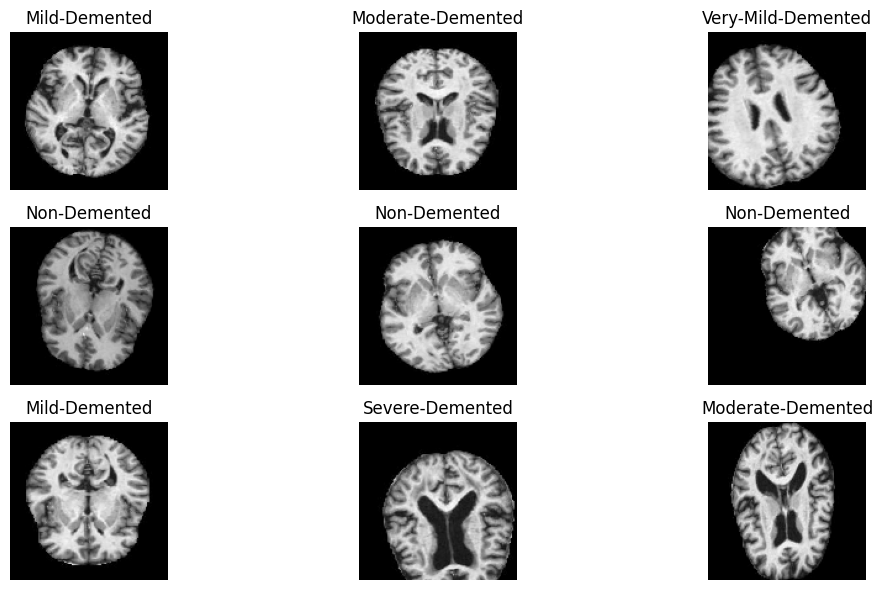

In [ ]:

plt.figure(figsize=(12, 6))

for images, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

print(" Data optimized for faster training!")

 Data optimized for faster training!


In [ ]:
# CNN architecture
model = keras.Sequential([
    # Input layer
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    # Block 1
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),

    # Block 2
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),

    # Block 3
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

print(" Model architecture created!")

 Model architecture created!


In [ ]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,483,397 (32.36 MB)

 Trainable params: 8,483,397 (32.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")
print("Ready for training! ")

Model compiled successfully!
Ready for training! 


In [ ]:
# Training start
print("Starting training...")
print("This will take 5-10 minutes...\n")

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=EPOCHS,
    verbose=1
)

print("\n Training completed!")

Starting training...
This will take 5-10 minutes...

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.3537 - loss: 19.1696 - val_accuracy: 0.6897 - val_loss: 0.7637
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.5479 - loss: 1.0748 - val_accuracy: 0.8046 - val_loss: 0.3624
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.7215 - loss: 0.6728 - val_accuracy: 0.8977 - val_loss: 0.3112
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.8051 - loss: 0.4659 - val_accuracy: 0.8287 - val_loss: 0.4306
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.8653 - loss: 0.3756 - val_accuracy: 0.8621 - val_loss: 0.3707

 Training completed!


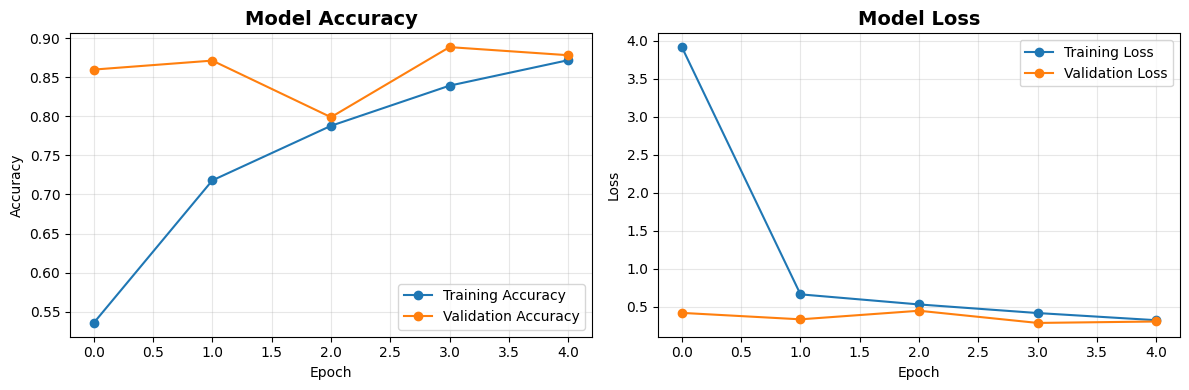

In [ ]:
# Accuracy aur Loss graphs banao
plt.figure(figsize=(12, 4))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Final results
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print("="*50)
print("FINAL RESULTS (Scratch CNN):")
print("="*50)
print(f"Training Accuracy:   {final_train_acc*100:.2f}%")
print(f"Validation Accuracy: {final_val_acc*100:.2f}%")
print("="*50)

FINAL RESULTS (Scratch CNN):
Training Accuracy:   87.18%
Validation Accuracy: 87.82%
